In [5]:
pip install pandas_datareader


Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
import datetime as dt
import yfinance as yf
start='2010-01-01'
end=dt.datetime.now()
start,end

('2010-01-01', datetime.datetime(2023, 7, 11, 15, 45, 34, 449637))

In [3]:
df=yf.download('AAPL',start,end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507525,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404016,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434672,447610800


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-03,193.779999,193.880005,191.759995,192.460007,192.460007,31458200
2023-07-05,191.570007,192.979996,190.619995,191.330002,191.330002,46920300
2023-07-06,189.839996,192.020004,189.199997,191.809998,191.809998,45094300
2023-07-07,191.410004,192.669998,190.240005,190.679993,190.679993,46778000
2023-07-10,189.259995,189.990005,187.039993,188.610001,188.610001,59097500


In [5]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507525,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404016,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434672,447610800


In [6]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


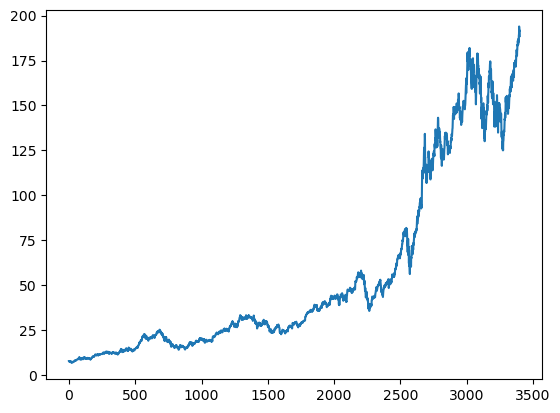

In [7]:
plt.plot(df.Close)

In [10]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3396    166.7144
3397    167.1085
3398    167.5179
3399    167.9146
3400    168.2622
Name: Close, Length: 3401, dtype: float64

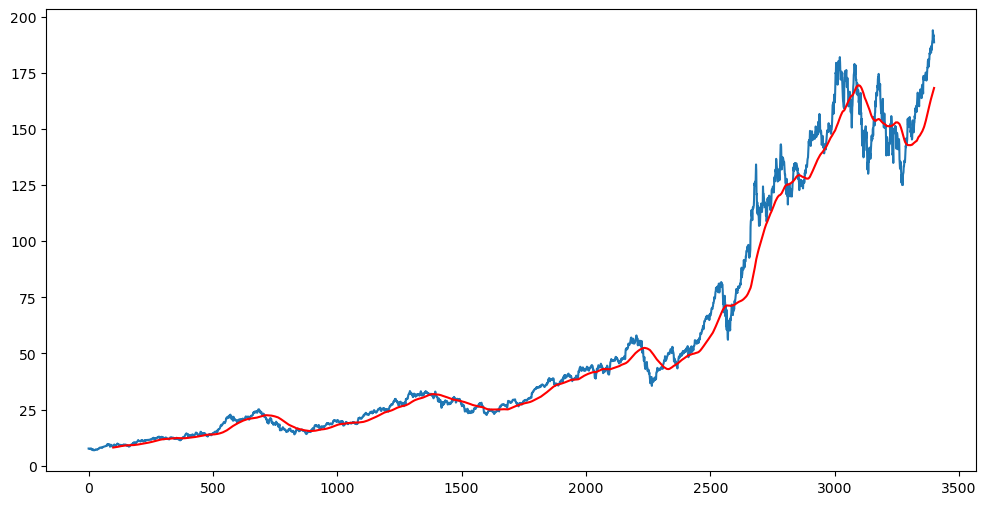

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [12]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3396    154.75970
3397    154.95450
3398    155.16005
3399    155.34105
3400    155.49960
Name: Close, Length: 3401, dtype: float64

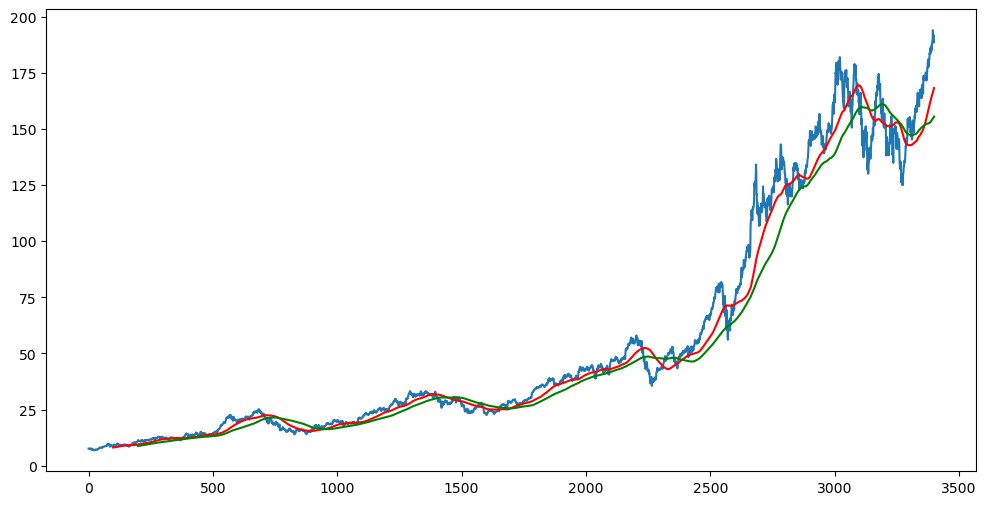

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [29]:
df.shape

(3401, 5)

In [14]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2380, 1)
(1021, 1)


In [15]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [16]:
data_testing.head()

,Close
2380,49.467499
2381,49.865002
2382,49.695000
2383,49.645000
2384,48.892502


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.80780346],
       [0.81342322],
       [0.83570686]])

In [19]:
data_training_array.shape

(2380, 1)

In [20]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train = np.array(x_train),np.array(y_train)


In [21]:
pip install keras


     ---------------------------------------- 1.7/1.7 MB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [22]:


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [23]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
72/72 [==============================] - 33s 308ms/step - loss: 0.0315
Epoch 2/50
72/72 [==============================] - 22s 299ms/step - loss: 0.0077
Epoch 3/50
72/72 [==============================] - 21s 288ms/step - loss: 0.0068
Epoch 4/50
72/72 [==============================] - 21s 297ms/step - loss: 0.0053
Epoch 5/50
72/72 [==============================] - 22s 302ms/step - loss: 0.0057
Epoch 6/50
72/72 [==============================] - 21s 287ms/step - loss: 0.0049
Epoch 7/50
72/72 [==============================] - 21s 294ms/step - loss: 0.0048
Epoch 8/50
72/72 [==============================] - 22s 307ms/step - loss: 0.0051
Epoch 9/50
72/72 [==============================] - 21s 288ms/step - loss: 0.0044
Epoch 10/50
72/72 [==============================] - 22s 300ms/step - loss: 0.0049
Epoch 11/50
72/72 [==============================] - 22s 307ms/step - loss: 0.0039
Epoch 12/50
72/72 [==============================] - 21s 287ms/step - loss: 0.0039
Epoch 13/50
7

In [24]:
model.save('keras_model')

INFO:tensorflow:Assets written to: keras_model\assets


INFO:tensorflow:Assets written to: keras_model\assets


In [25]:
data_testing.head()

,Close
2380,49.467499
2381,49.865002
2382,49.695000
2383,49.645000
2384,48.892502


In [26]:
past_100_days = data_training.tail(100)

In [27]:
final_df = pd.concat([past_100_days,data_testing],ignore_index=True)

In [28]:
final_df.head()

,Close
0,39.439999
1,39.075001
2,38.669998
3,41.312500
4,41.610001


In [29]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.00495815],
       [0.00260787],
       [0.        ],
       ...,
       [0.98609141],
       [0.97881514],
       [0.96548615]])

In [30]:
input_data.shape

(1121, 1)

In [31]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [32]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1021, 100, 1)
(1021,)


In [33]:
y_predicted = model.predict(x_test)

32/32 [==============================] - 4s 104ms/step


In [34]:
y_predicted.shape

(1021, 1)

In [35]:
y_test

array([0.06952673, 0.07208631, 0.07099164, ..., 0.98609141, 0.97881514,
       0.96548615])

In [36]:
y_predicted

array([[0.143178  ],
       [0.14311849],
       [0.14315242],
       ...,
       [0.88515794],
       [0.8892838 ],
       [0.89256847]], dtype=float32)

In [37]:
scaler.scale_

array([0.00643915])

In [38]:
scale_factor = 1/0.00689524
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

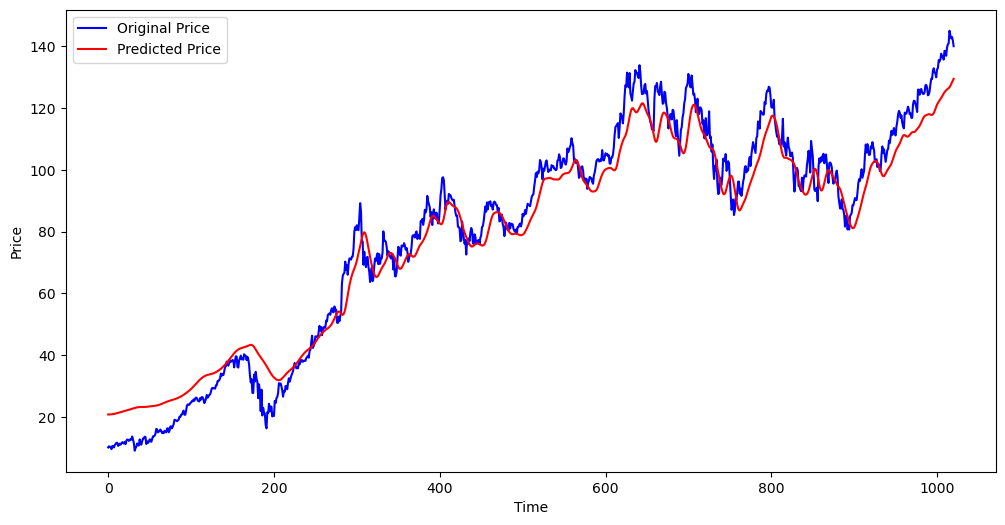

In [39]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()